

<h3 align="center">State of Iowa:</h3> 
<h3 align="center">Alcoholic Beverages Commission</h3> 



In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
df = pd.read_csv('/Users/smoot/Desktop/ga/DSI_SM_01/Iowa_Liquor_sales_sample_10pct.csv', dtype = {'Zip Code': 'str'})

In [23]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [24]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [25]:
# Dropping the redundant columns
df = df.drop(['County'],  axis = 1)
df = df.drop(['Category Name'], axis = 1)
df = df.drop(['Item Number'], axis = 1)
df = df.dropna()


In [26]:
# Removing the $ so I can change the data types so that I can change them to floats.
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    df[col] = df[col].map(lambda x: x.strip('$'))

In [27]:
# Changeing all columns that are representing $$$ to floats.
for col in cols:
    df[col] = df[col].astype(float)

In [28]:
# Changing column types to ints instead of floats.
df['Category'] = df['Category'].astype(int)
df['County Number'] = df['County Number'].astype(int)

In [29]:
# Changing the dates from string to datetime format.
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y")

In [30]:
# Changing all non-measurable columns to strings.
strings = ['Store Number', 'County Number', 'Category', 'Vendor Number']
for i in strings:
    df[i] = df[i].astype(str) 

In [31]:
# Check the data types
df.dtypes

Date                     datetime64[ns]
Store Number                     object
City                             object
Zip Code                         object
County Number                    object
Category                         object
Vendor Number                    object
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

# Exploratory analysis

In [32]:
df.describe()

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,269810.000000,269810.000000,269810.00000,269810.000000,269810.000000,269810.000000,269810.000000
mean,924.811275,9.772439,14.67454,9.874334,128.965269,8.988658,2.374760
std,492.743698,7.048074,10.57158,24.064832,383.663915,28.966978,7.652259
min,50.000000,0.890000,1.34000,1.000000,1.340000,0.100000,0.030000
25%,750.000000,5.500000,8.27000,2.000000,30.450000,1.500000,0.400000
50%,750.000000,8.000000,12.27000,6.000000,70.560000,5.250000,1.390000
75%,1000.000000,11.920000,17.88000,12.000000,135.000000,10.500000,2.770000
max,6000.000000,425.000000,637.50000,2508.000000,36392.400000,2508.000000,662.540000


(0, 500.0)

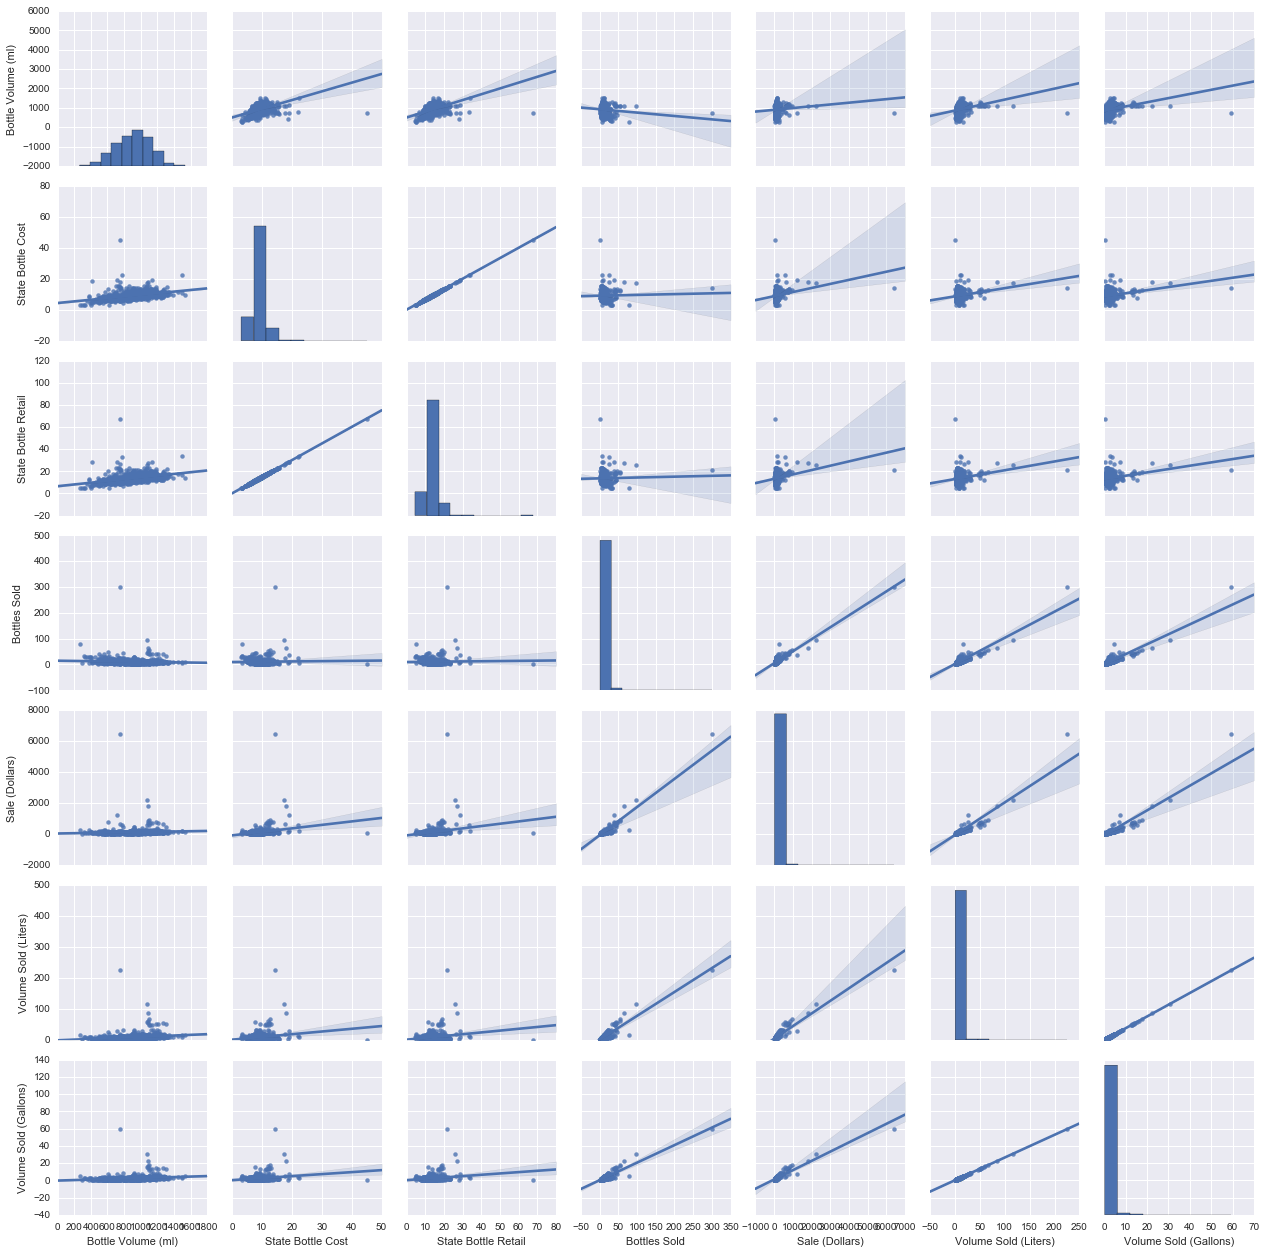

In [33]:
store = df.groupby(['Store Number']).mean()
sns.pairplot(store, kind = 'reg', palette = 'Set2')
plt.xlim(0)
plt.ylim(0)

(array([  2.64141000e+05,   5.24400000e+03,   2.63000000e+02,
          4.80000000e+01,   1.01000000e+02,   7.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([   0.89 ,   29.164,   57.438,   85.712,  113.986,  142.26 ,
         170.534,  198.808,  227.082,  255.356,  283.63 ,  311.904,
         340.178,  368.452,  396.726,  425.   ]),
 <a list of 15 Patch objects>)

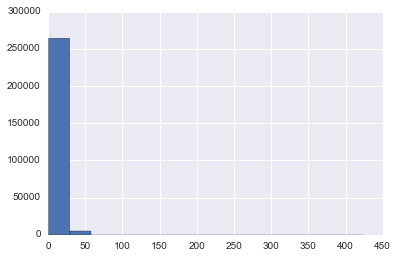

In [18]:
plt.hist(df['State Bottle Cost'], bins = 15)

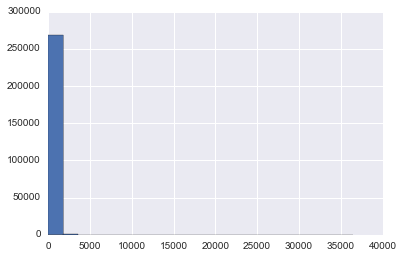

In [19]:
df['Sale (Dollars)'].hist(bins = 20)

# Mine the data

In [34]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
# Filter out stores that opened or closed throughout the year
lower_cutoff = pd.Timestamp("20150301")
upper_cutoff = pd.Timestamp("20151001")
mask = (dates['Date amin'] < lower_cutoff) & (dates['Date amax'] > upper_cutoff)
good_stores = dates[mask]["Store Number"]
df = df[df["Store Number"].isin(good_stores)]

In [35]:
# Make sure stores were removed that opened/closed during 2015
df.shape

(256696, 15)

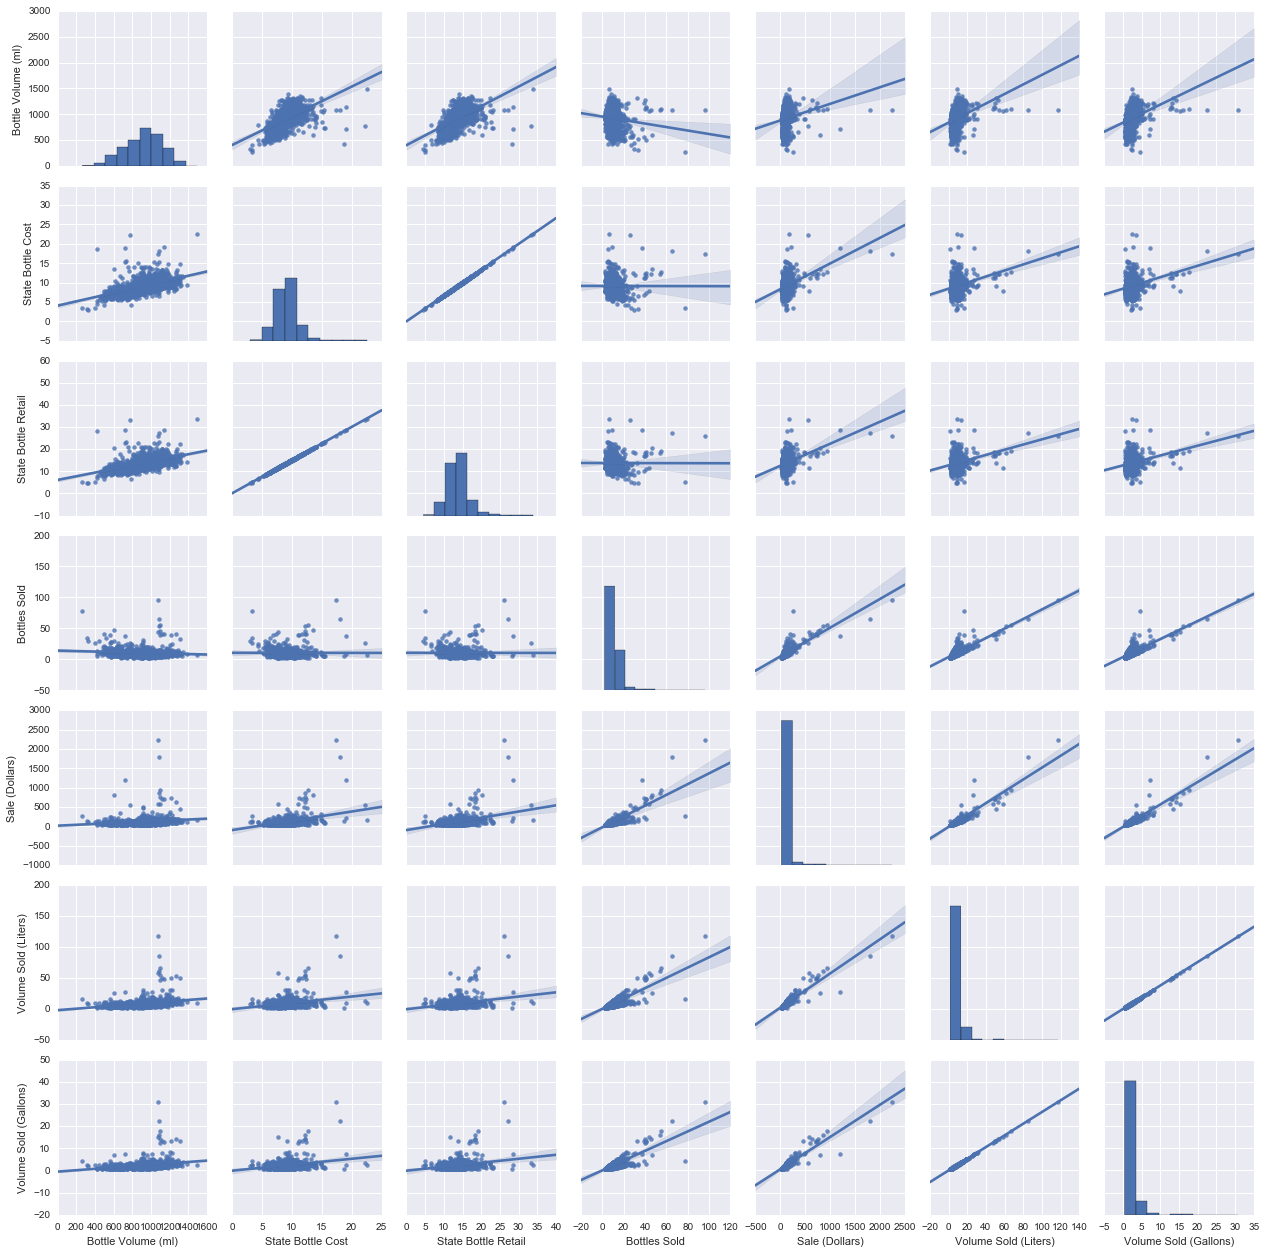

In [36]:
# Looking at some relationships in the data...
s = df.groupby(['Store Number']).mean()
sns.pairplot(s, kind = 'reg', palette = 'Set2')

In [37]:
bottles_sold = df.groupby(by = "City").max()
bottles_sold.sort_values('Sale (Dollars)', ascending = False)

,Date,Store Number,Zip Code,County Number,Category,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
City,,,,,,,,,,,,,,
DES MOINES,2016-03-31,5098,50322,77,1701100,978,maDIKwe,4800,224.16,336.24,1320,36392.40,1320.0,348.71
WEST DES MOINES,2016-03-31,5092,50266,77,1701100,978,maDIKwe,3000,149.99,224.99,1800,32184.00,2100.0,554.76
CORALVILLE,2016-03-31,5009,52241,52,1701100,978,Zyr Vodka,4800,150.38,225.57,552,29327.76,966.0,255.19
MOUNT PLEASANT,2016-03-28,5072,52641,44,1701100,971,Yukon Jack Perma Frost Schnapps,3000,57.99,86.99,1164,17378.52,2037.0,538.12
DENISON,2016-03-31,5079,51442,24,1701100,971,Yukon Jack Canadian Liqueur,1750,130.00,195.00,1164,17378.52,2037.0,538.12
IOWA CITY,2016-03-30,5060,52246,52,1701100,978,Zaya Guatemalan Rum,6000,135.25,202.88,840,16542.00,780.0,206.05
COUNCIL BLUFFS,2016-03-29,5078,51503,78,1701100,978,Yukon Jack Jacapple,3000,135.25,202.88,600,16542.00,693.0,183.07
WINDSOR HEIGHTS,2016-03-30,4461,50324,77,1701100,978,maDIKwe,3000,130.00,195.00,1116,16200.00,1116.0,294.82
URBANDALE,2016-03-31,4941,50323,77,1701100,971,Woodford Reserve Bourbon,3000,425.00,637.50,708,15930.00,531.0,140.28


In [39]:
dates = df.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]

In [523]:
# df.to_csv('r_smoot_project3_clean.csv')

# How About Some New Metrics!?

In [40]:
# profit margin
df['Profit Margin'] = (df['State Bottle Retail'] - df['State Bottle Cost']) * df['Bottles Sold']
#Price Per liter/Price Per Bottle
df['Price Per Liter'] = df['Sale (Dollars)'] / df['Volume Sold (Liters)'] 
df['Price Per Bottle'] = df['Sale (Dollars)'] /df['Bottles Sold']


df.head(1)

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Profit Margin,Price Per Liter,Price Per Bottle
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,27.0,9.0,6.75


In [41]:
# Just 2015
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)

# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Profit Margin": [np.sum, np.mean],
                   "Price Per Liter": np.mean,     
                   "Zip Code": lambda x: x.iloc[0], 
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})

# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]



In [42]:
# Rename columns
sales.columns = [u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', u'County Number',
       u'Price Per Liter mean', u'Zip Code',
       u'2015 Volume Sold Liters', u'2015 Volume Sold Liters mean', u'Profit Margin Sum', u'2015 Profit Margin mean']
sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price Per Liter mean,Zip Code,2015 Volume Sold Liters,2015 Volume Sold Liters mean,Profit Margin Sum,2015 Profit Margin mean
0,2106,CEDAR FALLS,146326.22,277.658861,7,17.856601,50613,48838.08,92.671879,9731.85,18.466509
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,3109.04,21.149932,659.85,4.488776
2,2130,WATERLOO,111871.43,285.386301,7,16.835809,50703,37325.20,95.217347,6891.37,17.580026
3,2152,ROCKWELL,7721.08,54.759433,17,13.020765,50469,2587.53,18.351277,633.37,4.491986
4,2178,WAUKON,24324.18,102.633671,3,16.053844,52172,8165.70,34.454430,1917.12,8.089114


In [596]:
# Store Number sum of sales by week.  It appears that sales were reported every Thursday except for for the first
# Thursday of July when it was reported on a Wednesday.  Presumably this is because of the 4th of July holiday.  
# Because of this discrepancy it may be more accurate to use the mean as our measure.
# gg = df.groupby(by =['Store Number', 'Date'], sort = True).mean()
# gg.head()

In [386]:
# gg.mean()

In [387]:
# gg.median()

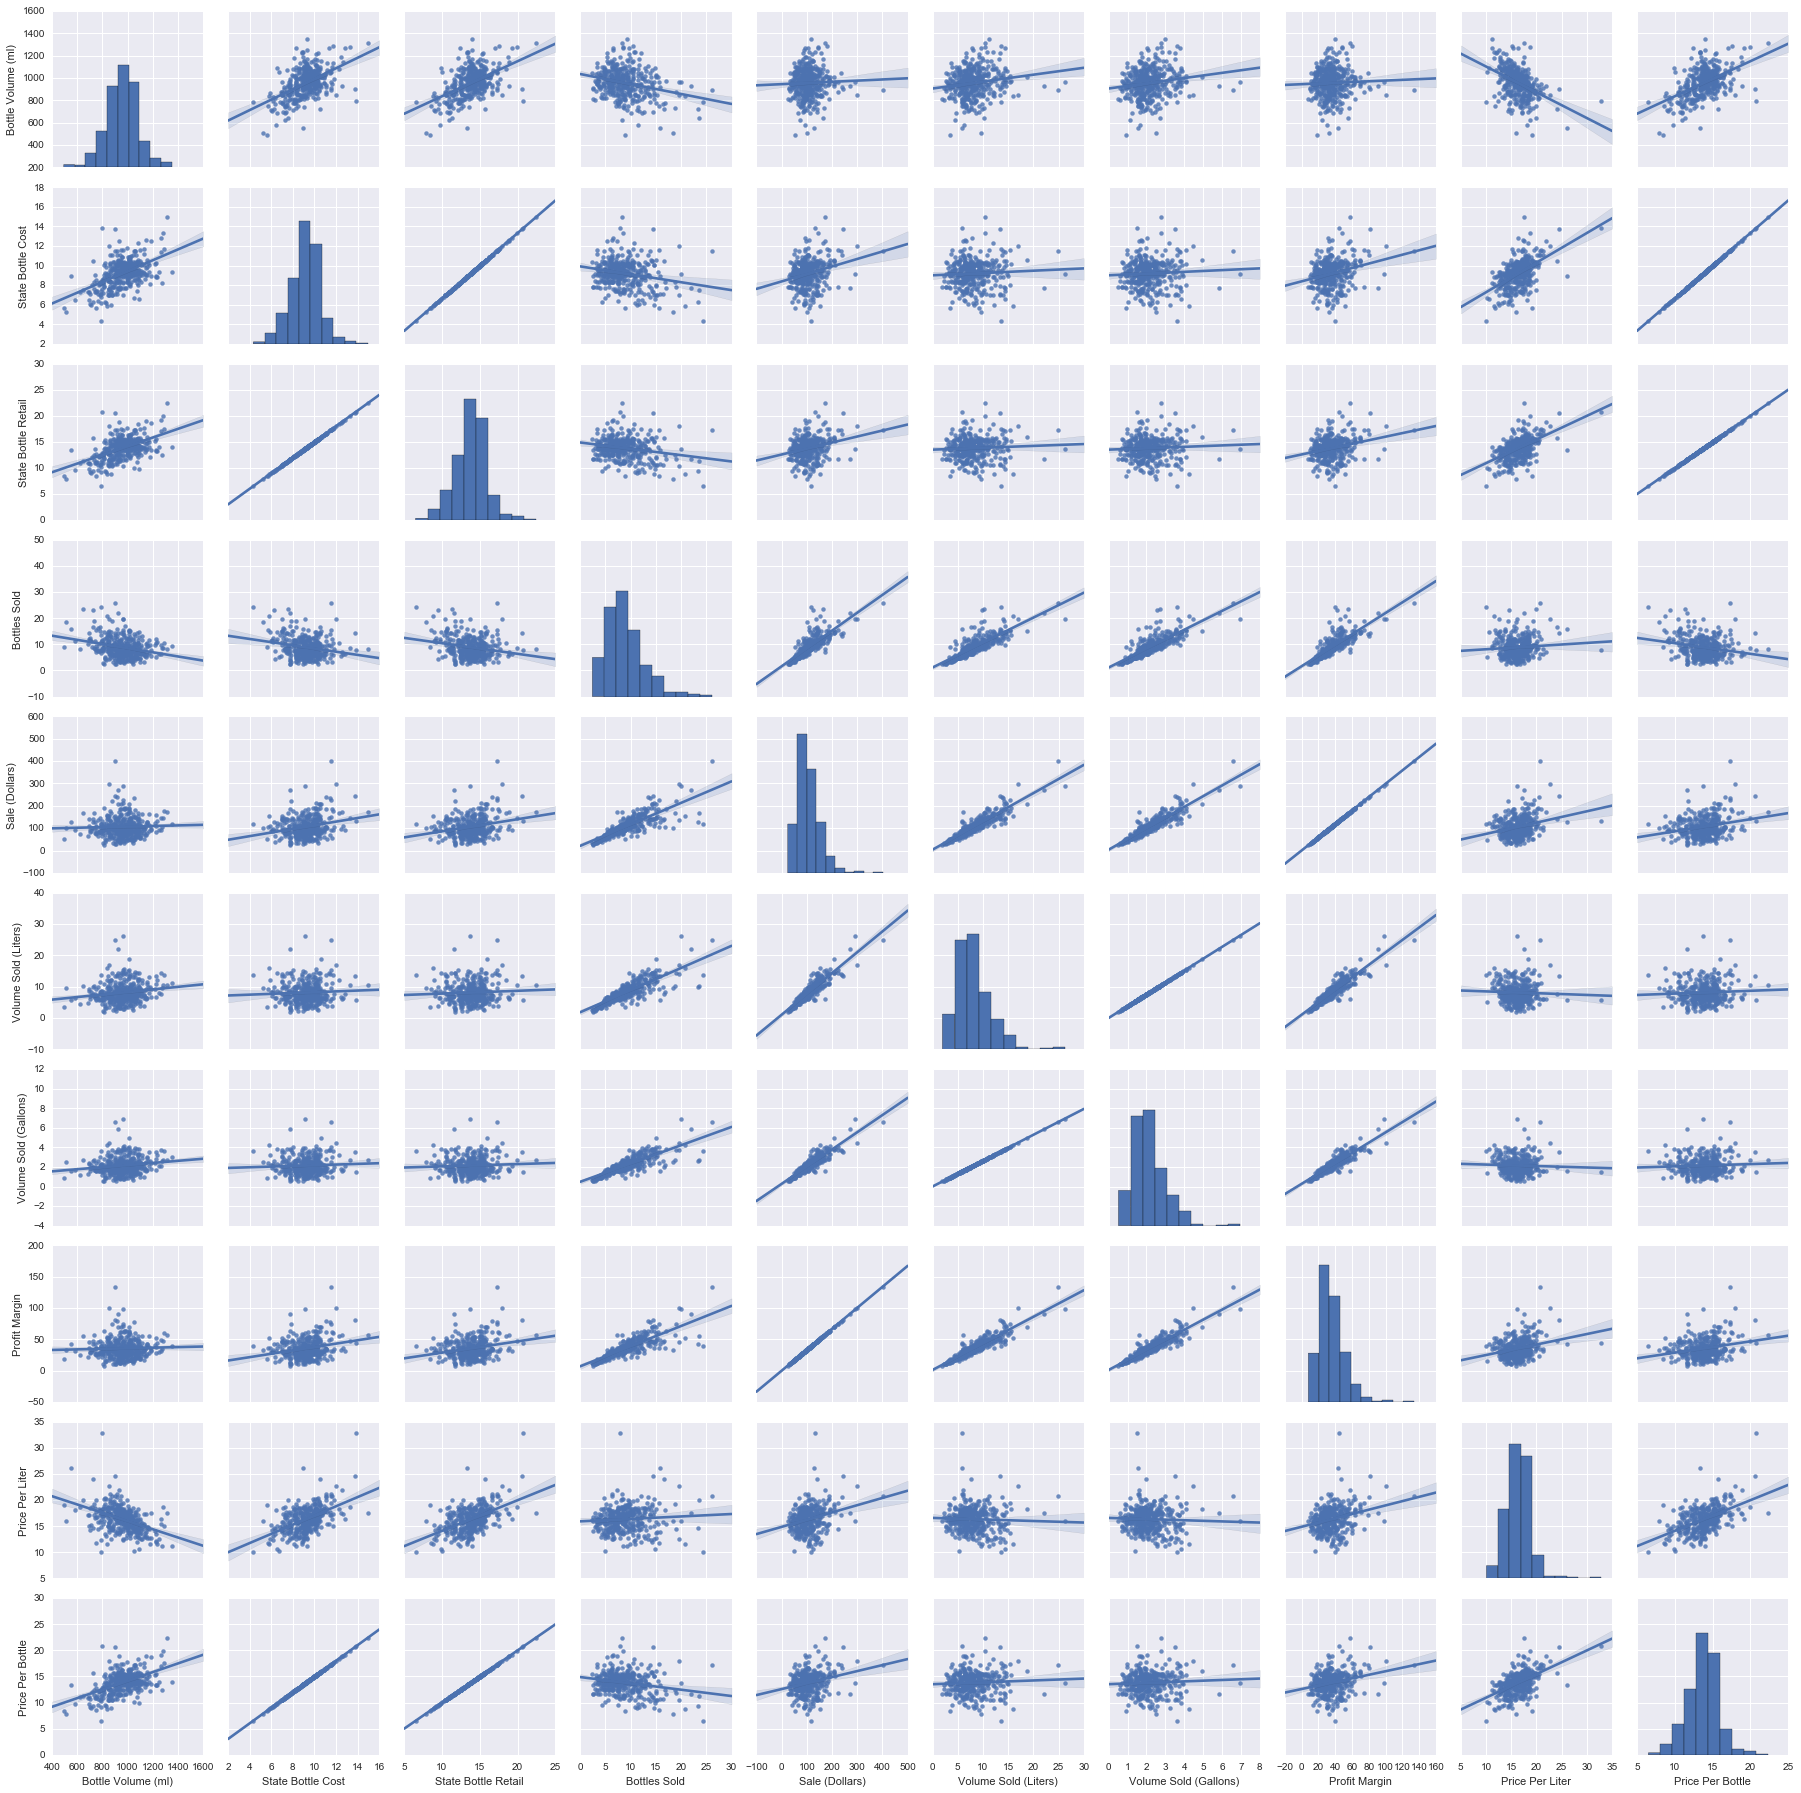

In [44]:
# Pair plot using 'Zip Code' as the response variable.
zip_store = df.groupby(by = ('Zip Code')).mean()
sns.pairplot(zip_store, kind = 'reg', palette = 'CCB974')

In [47]:
# Maximum number of Bottles sold in a week per store
bottles_sold = pd.pivot_table(df, values = ('Date', 'Bottles Sold'), index = 'Store Number', aggfunc = 'max', dropna = True)
bottles_sold = pd.DataFrame(bottles_sold)
bottles_sold.head()
max_bottles_sold = bottles_sold.sort_values("Bottles Sold")
max_bottles_sold

,Bottles Sold,Date
Store Number,,
4364,12,2016-03-31
3930,12,2016-03-23
4799,12,2016-03-28
3582,12,2016-03-31
4791,12,2016-02-24
4940,12,2016-03-07
4941,12,2016-03-31
3591,12,2015-12-26
4498,12,2016-03-21


In [48]:
# Making sure the Store Number is a string and not something I'm not expecting.
sales['Store Number'] = sales['Store Number'].astype(str)

In [51]:
# Q1 Sales 2015
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q1"] = df2["Sale (Dollars)"]
df2.max()

Store Number        9010.00
Sale (Dollars)    207012.08
dtype: float64

In [52]:
# Sales 2016 Q1
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df3 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2016 Sales Q1"] = df3["Sale (Dollars)"]
# sales['1st Quarter Difference'] = sales['2015 Sales Q1'] - sales['2016 Sales Q1']
df3.max()

Store Number        9010.00
Sale (Dollars)    219551.79
dtype: float64

(0, 50000)

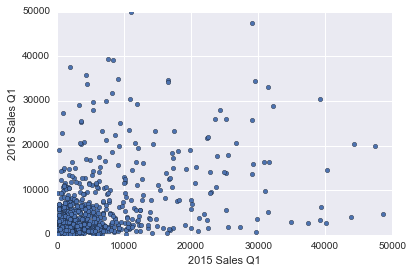

In [60]:
# IV: 2015 Sales Q1 DV: 2016 Sales Q1
sales.plot(kind='scatter', x="2015 Sales Q1", y="2016 Sales Q1", );
plt.xlim(0, 50000)
plt.ylim(0, 50000)

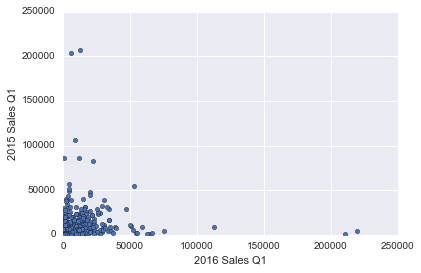

In [54]:
# Opposit of the plot above
sales.plot.scatter(x = '2016 Sales Q1', y = '2015 Sales Q1', xlim = 0, ylim = 0)

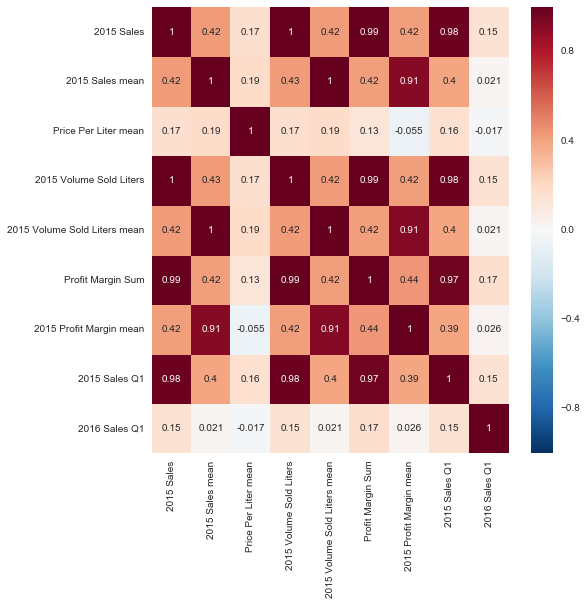

In [58]:
# Correlations accross the sales dataframe.
sales_corr = sales.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(sales_corr, robust = True, annot = True)

In [59]:
sales.sort_values('2015 Sales Q1', ascending = False)

,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price Per Liter mean,Zip Code,2015 Volume Sold Liters,2015 Volume Sold Liters mean,Profit Margin Sum,2015 Profit Margin mean,2015 Sales Q1,2016 Sales Q1
123,2633,DES MOINES,1000783.30,500.391650,77,21.019238,50320,333816.91,166.908455,61909.75,30.954875,207012.08,12748.68
952,4829,DES MOINES,878812.70,478.656155,77,21.449783,50314,293196.99,159.693350,50792.74,27.664891,203842.07,5641.92
179,3385,CEDAR RAPIDS,441983.55,924.651778,57,19.078256,52402,147884.62,309.382050,31563.00,66.031381,105921.75,8731.68
364,3952,BETTENDORF,333311.98,363.480894,82,23.168556,52722,111230.21,121.297939,18637.38,20.324297,85840.78,788.50
185,3420,WINDSOR HEIGHTS,352020.66,1035.354882,77,19.146492,50311,117593.34,345.862765,25143.00,73.950000,85542.78,11640.67
35,2512,IOWA CITY,419746.83,305.048568,52,19.783300,52240,140143.46,101.848445,25921.88,18.838576,82117.82,22169.46
301,3814,WEST DES MOINES,247417.42,2061.811833,25,27.860845,50266,83004.48,691.704000,12984.00,108.200000,56443.62,4339.24
188,3447,SIOUX CITY,187650.04,647.069103,97,17.730097,51106,62683.22,216.149034,13082.50,45.112069,54233.74,53213.22
305,3820,SIOUX CITY,172792.22,210.979512,97,20.524943,51103,57650.18,70.390940,9760.14,11.917143,51033.86,4377.24
284,3773,CEDAR RAPIDS,232460.41,249.421041,57,24.662500,52401,77525.08,83.181416,12564.22,13.480923,48574.94,4561.96


In [61]:
# I tried removing the two biggest outliers just to experiment with the effects.  It made the risidual measures all increase.
# sales.drop(sales.index[[952]], inplace = True)
# sales.drop(sales.index[[123]], inplace = True)

# Sales by County Number

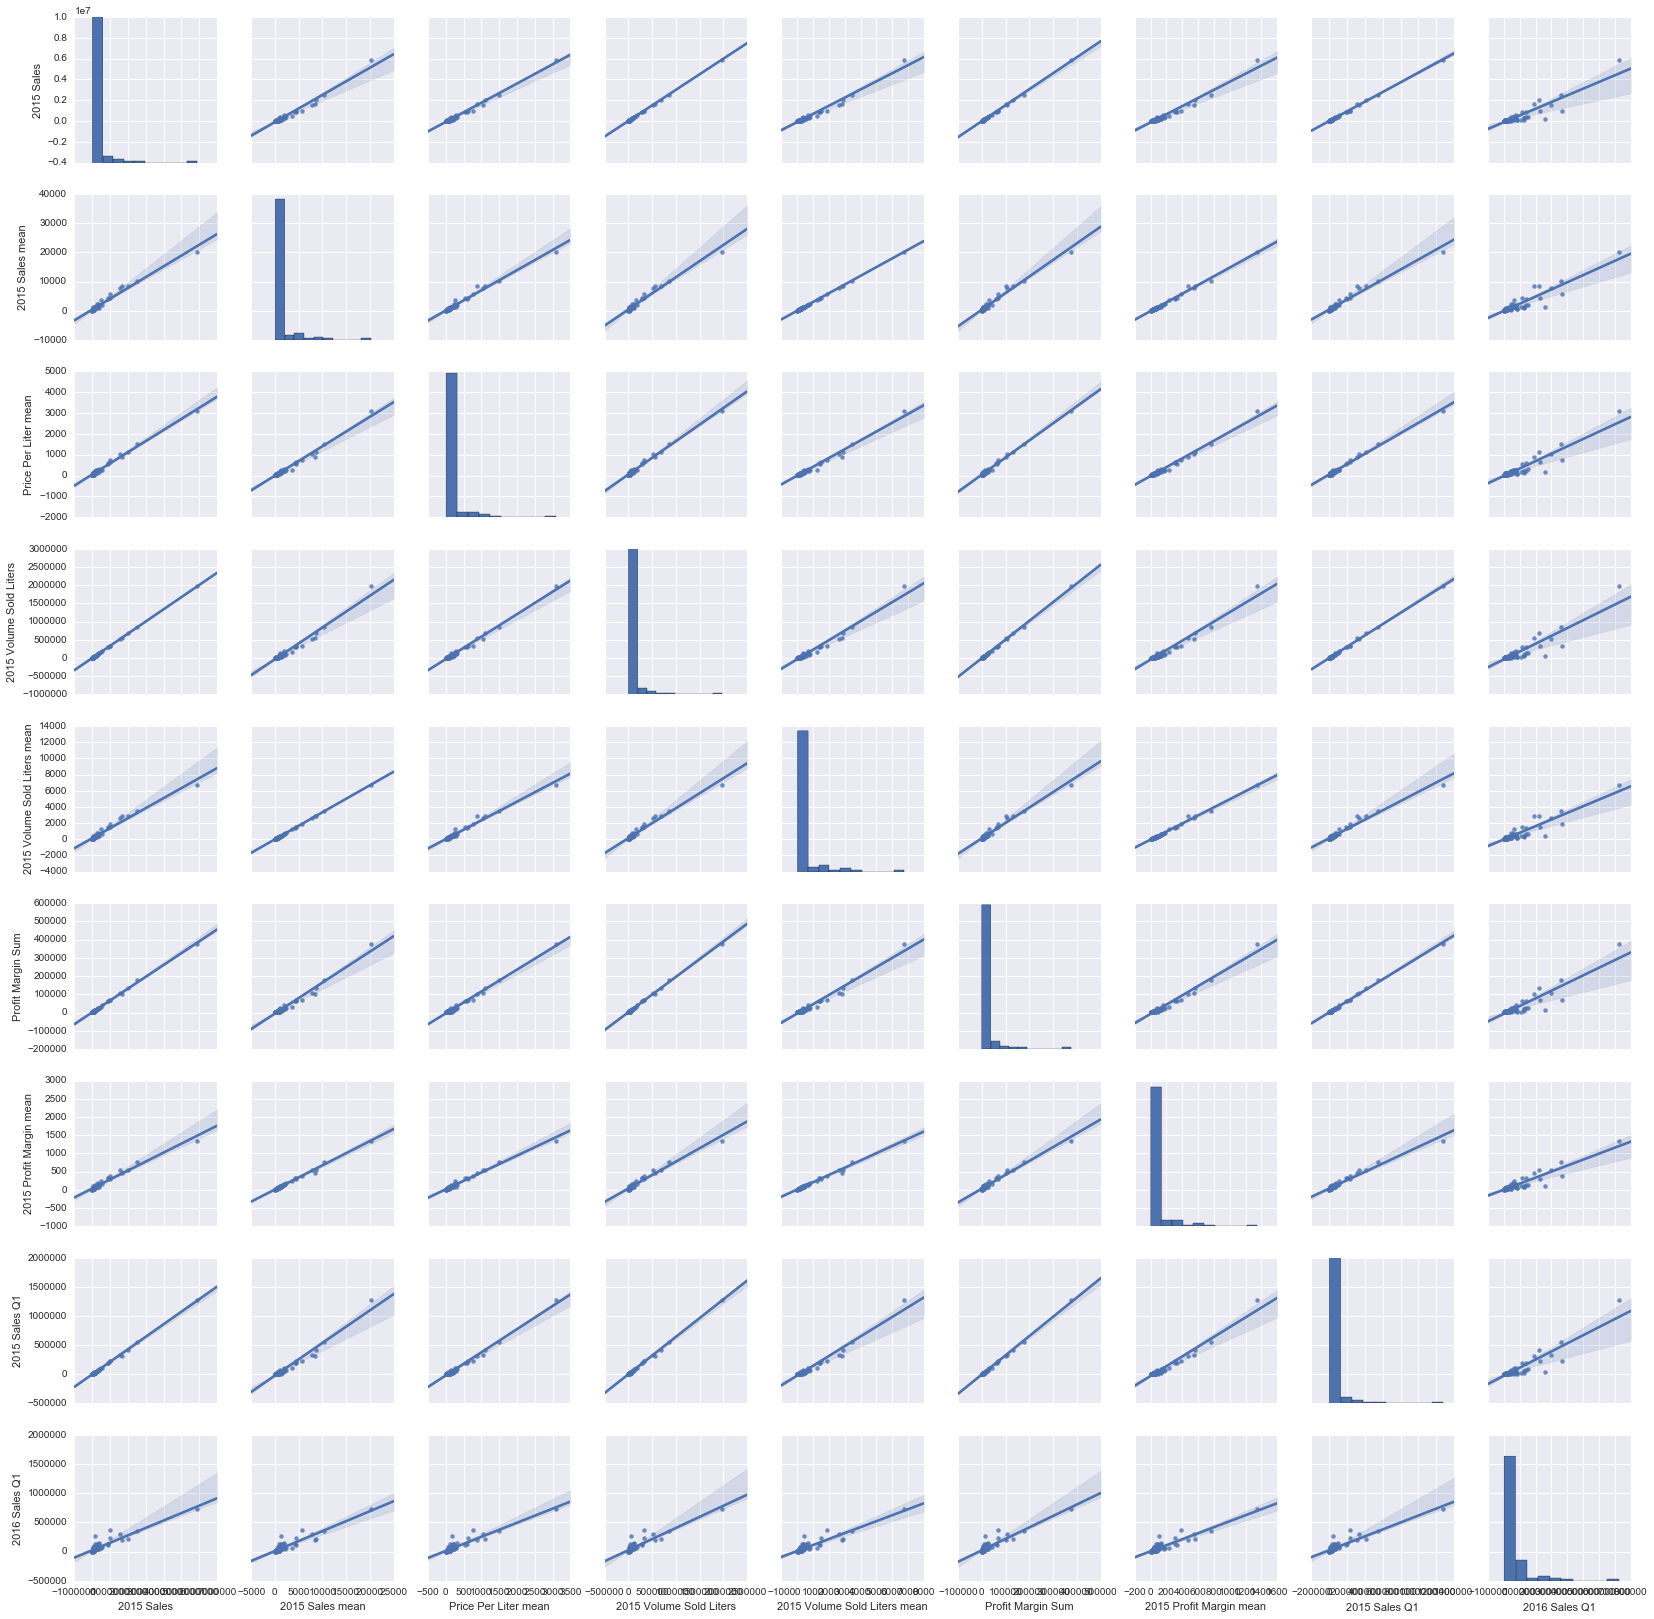

In [62]:
county_performance_sum = sales.groupby(('County Number'), axis = 0, sort = False).sum()
sns.pairplot(county_performance_sum, kind = "reg")

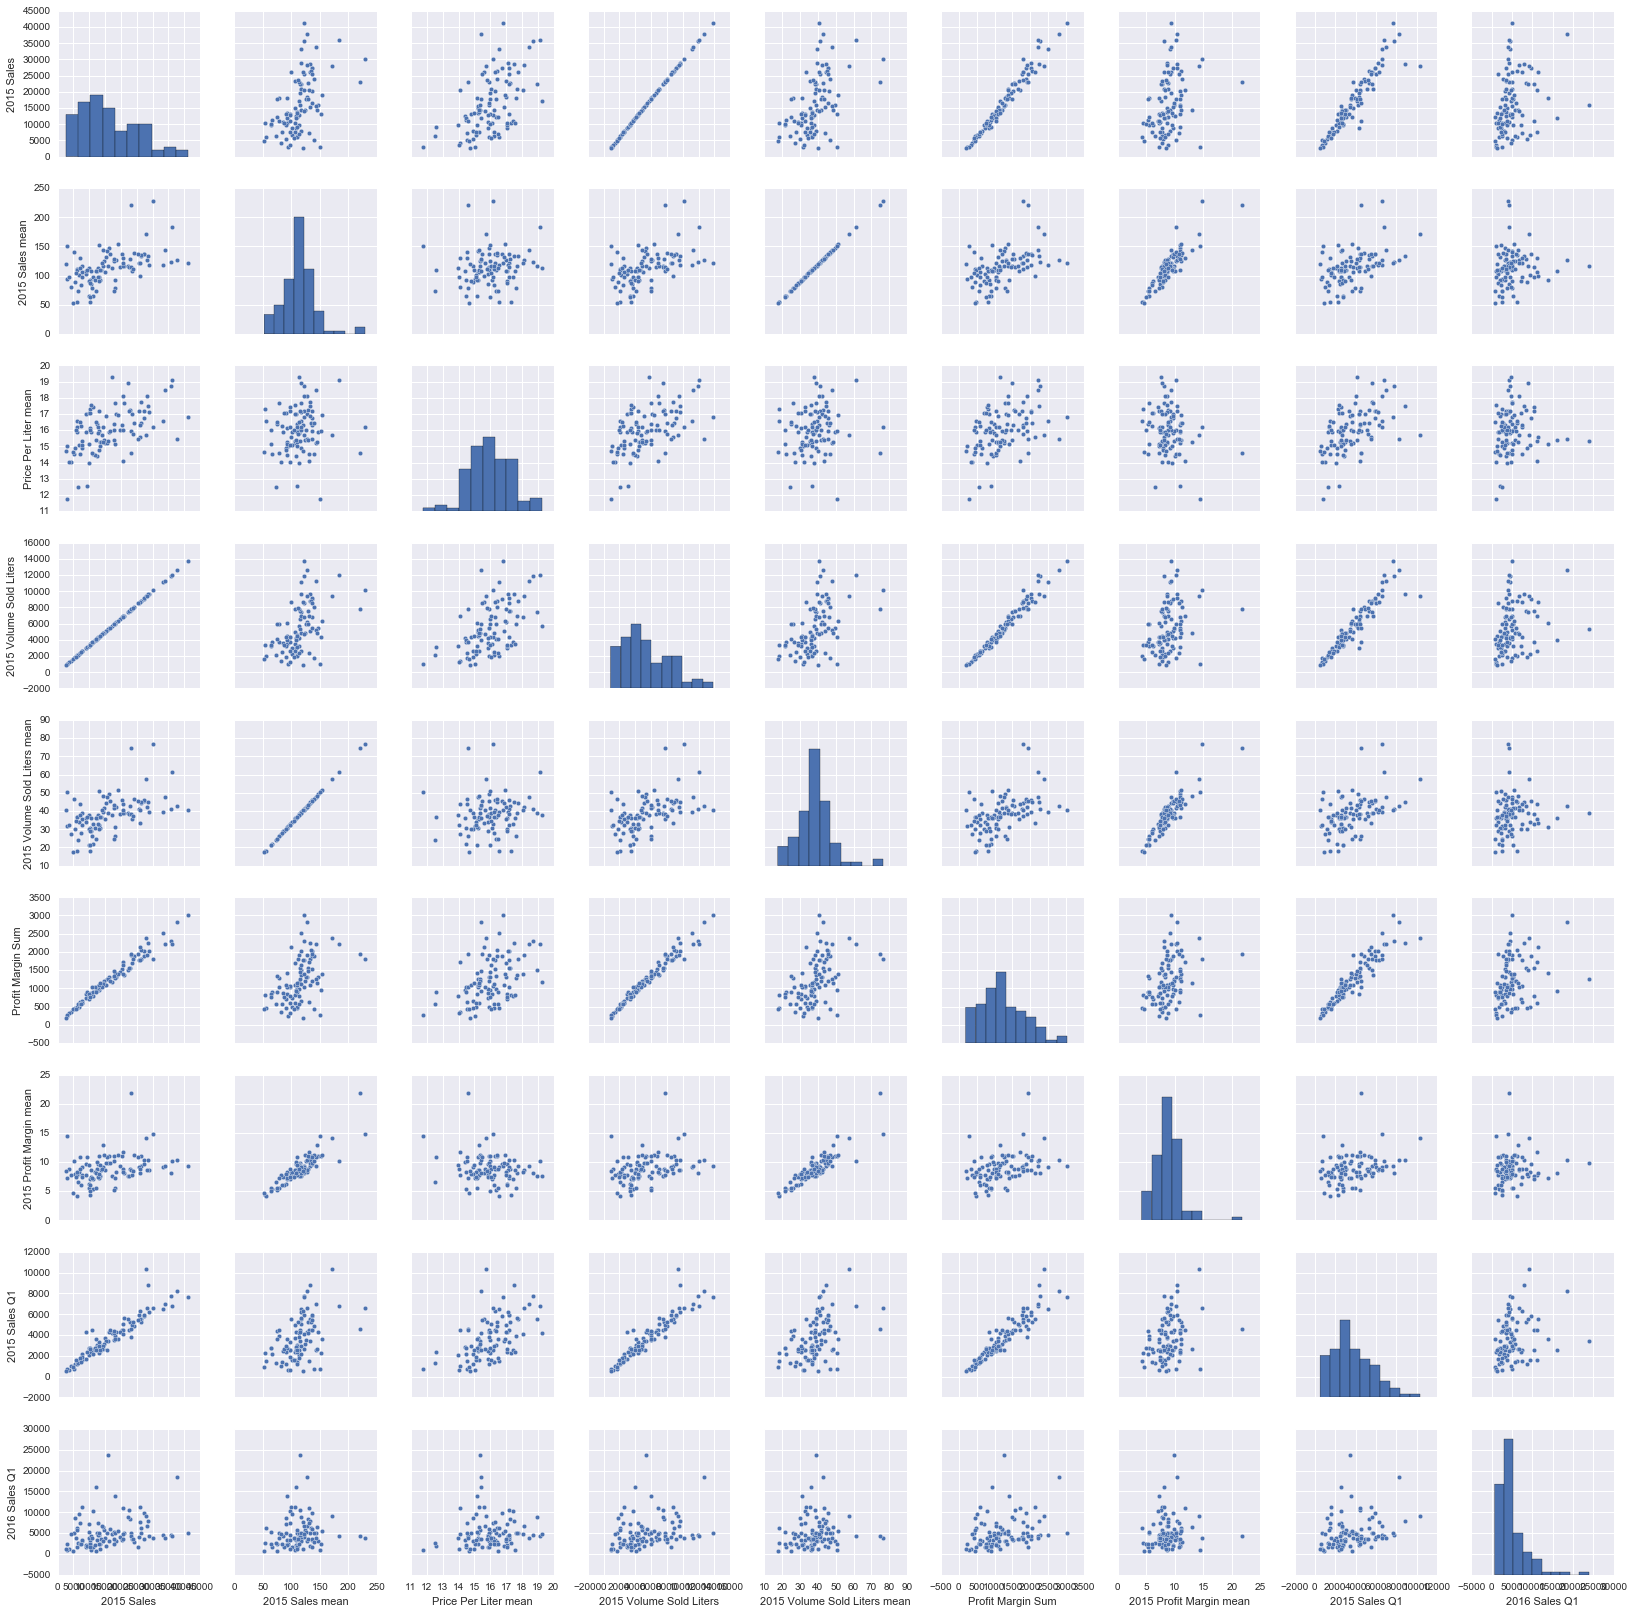

In [63]:
sales_county_m = sales.groupby('County Number', axis = 0, sort = False).mean()
sns.pairplot(sales_county_m)

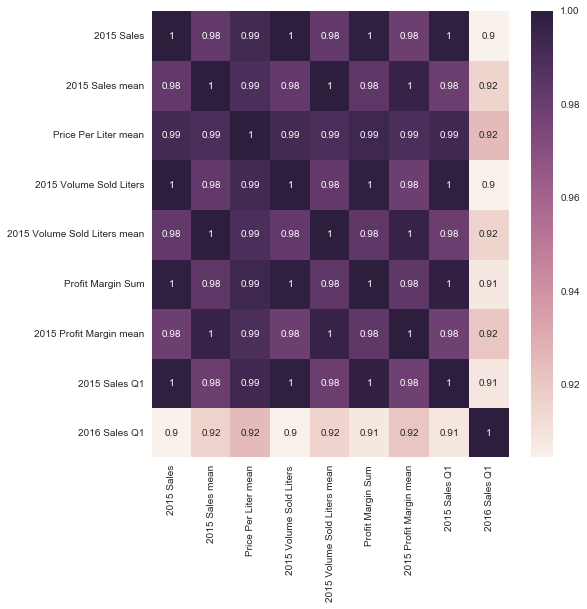

In [65]:
# Correlation of sum of county sales
plt.figure(figsize = (8, 8))
county_performance_sum= county_performance_sum.corr()
sns.heatmap(county_performance_sum, annot = True)

# Sales by City

In [67]:
sales_city_m = sales.groupby('City', axis = 0, sort = False).mean()
sales_city_m.head()

,2015 Sales,2015 Sales mean,Price Per Liter mean,2015 Volume Sold Liters,2015 Volume Sold Liters mean,Profit Margin Sum,2015 Profit Margin mean,2015 Sales Q1,2016 Sales Q1
City,,,,,,,,,
CEDAR FALLS,31367.598824,130.660666,16.676508,10492.070000,43.763249,2211.405294,9.934547,6878.604706,4395.235882
GOWRIE,9310.220000,63.334830,18.507700,3109.040000,21.149932,659.850000,4.488776,2833.250000,2065.900000
WATERLOO,28086.472647,141.431857,18.454057,9382.926765,47.243626,1901.140000,9.522574,5826.682059,5657.294242
ROCKWELL,7721.080000,54.759433,13.020765,2587.530000,18.351277,633.370000,4.491986,2003.460000,904.660000
WAUKON,21904.283333,105.367106,15.265880,7338.773333,35.375225,1681.746667,8.536140,4438.290000,3117.556667


(0, 800000.0)

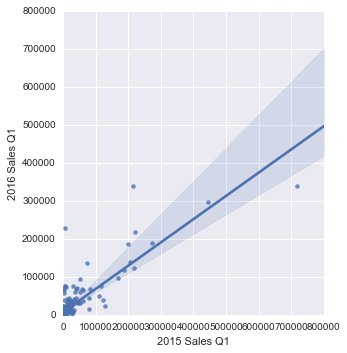

In [69]:
sales_city_s = sales.groupby('City').sum()
sns.lmplot(x = '2015 Sales Q1', y = '2016 Sales Q1', data = sales_city_s)
plt.xlim(0)
plt.ylim(0)

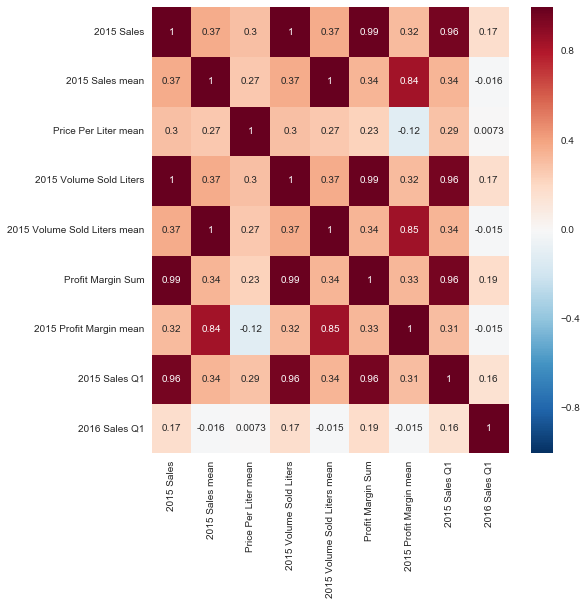

In [72]:
# correlation of mean sales by City
city_performance_mean = sales.groupby('City', axis = 0, sort = False).mean()
plt.figure(figsize = (8, 8))
city_performance_corr = city_performance_mean.corr()
sns.heatmap(city_performance_corr, annot = True)

# Sales by Zip Code

In [75]:
# Correlation of Sum of Sales by Zip Code
zipcode_performance = sales.groupby('Zip Code', axis = 0, sort = False).sum()
zipcode_performance

,2015 Sales,2015 Sales mean,Price Per Liter mean,2015 Volume Sold Liters,2015 Volume Sold Liters mean,Profit Margin Sum,2015 Profit Margin mean,2015 Sales Q1,2016 Sales Q1
Zip Code,,,,,,,,,
50613,516139.37,2172.898524,265.243091,172650.45,727.831902,36394.83,165.500119,113755.09,73387.25
50543,9310.22,63.334830,18.507700,3109.04,21.149932,659.85,4.488776,2833.25,2065.90
50703,376251.42,1760.650581,235.407112,125611.08,587.709708,22578.19,103.679911,82229.52,46222.42
50469,7721.08,54.759433,13.020765,2587.53,18.351277,633.37,4.491986,2003.46,904.66
52172,65712.85,316.101319,45.797641,22016.32,106.125675,5045.24,25.608420,13314.87,9352.67
50314,1042415.69,1168.369041,108.900145,347792.79,389.676449,59000.62,49.912594,245133.95,45306.87
52632,245322.69,1080.345607,114.486045,81898.55,361.064800,16695.53,76.612813,52013.31,94433.00
50583,30392.64,116.297964,29.852792,10194.65,39.000532,2560.79,10.364005,6422.93,5996.86
51632,54192.63,341.954588,64.315931,18124.58,114.491016,3790.74,25.883070,13053.80,13788.97


# Refine the data


# 2015 Sales Q1 grouped by Zip Code

In [77]:
sales_byzip_m = sales.groupby('Zip Code', axis = 0, sort = False).mean()
sales_byzip_s = sales.groupby('Zip Code', axis = 0, sort = False).sum()

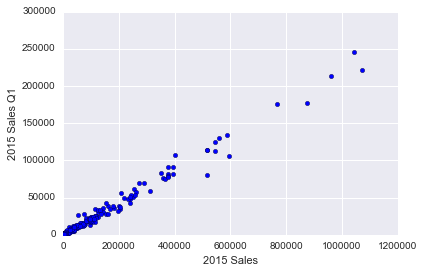

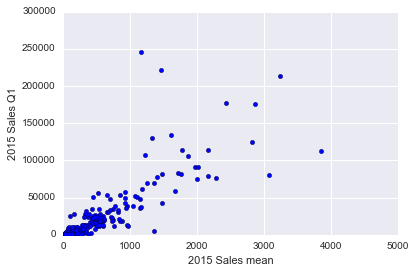

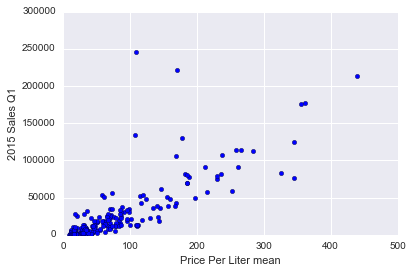

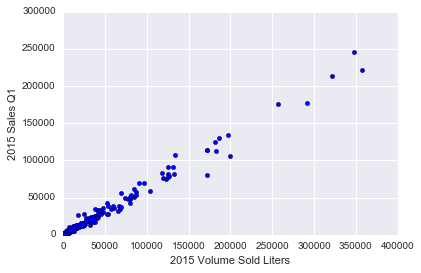

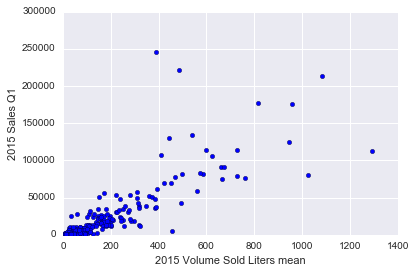

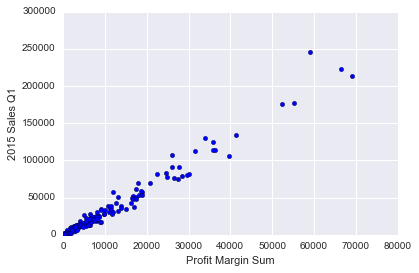

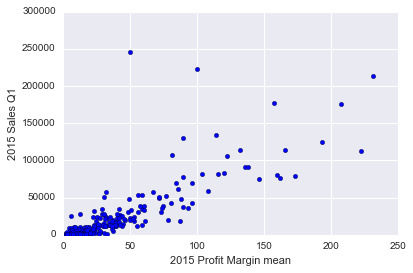

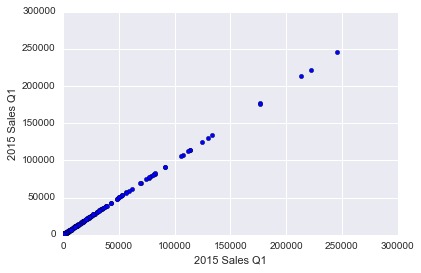

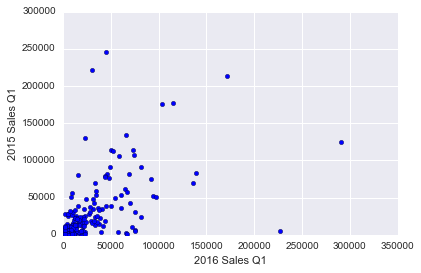

In [78]:
for col in sales_byzip_s:
    sales_byzip_s.plot.scatter(x=col, y= '2015 Sales Q1', c = 'b', xlim = 0, ylim = 0)

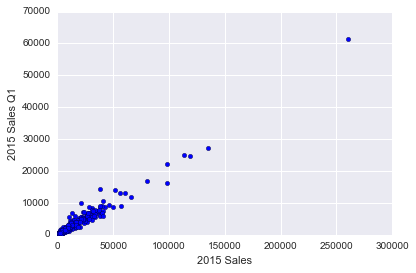

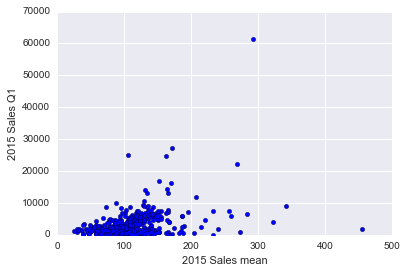

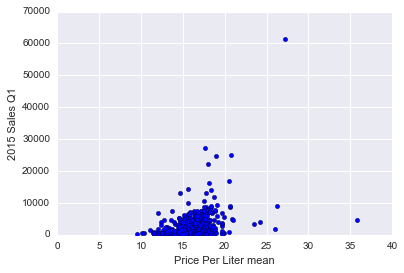

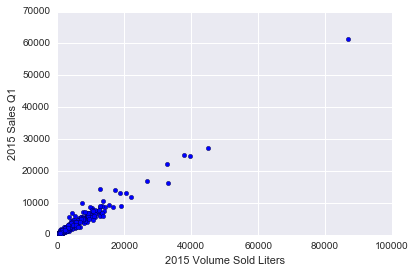

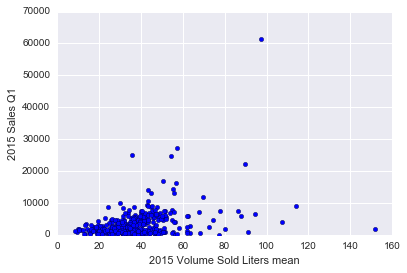

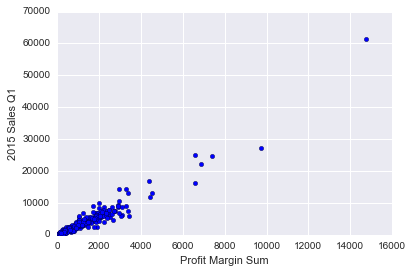

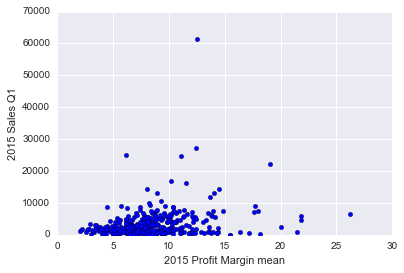

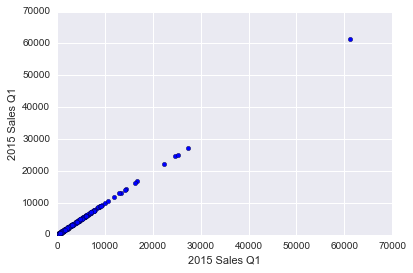

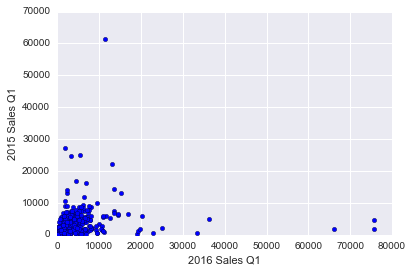

In [79]:
# 2015 Sales compared to other variables grouped by zip code.  
for col in sales_byzip_m:
    sales_byzip_m.plot.scatter(x=col, y= '2015 Sales Q1', c = 'b', xlim = 0, ylim = 0)

# 2015 Sales Q1 grouped by Store Number

In [80]:
# The distributions of sum and mean look the same.
sales_bystornum_m = sales.groupby('Store Number', axis = 0).mean()
sales_bystornum_s = sales.groupby('Store Number', axis = 0).sum()

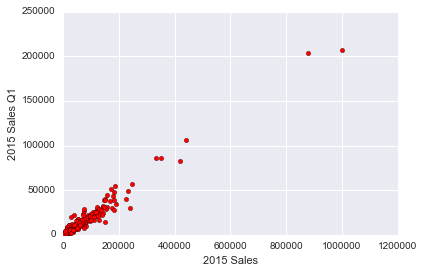

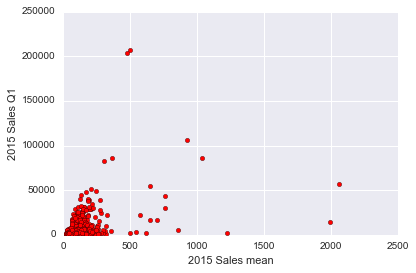

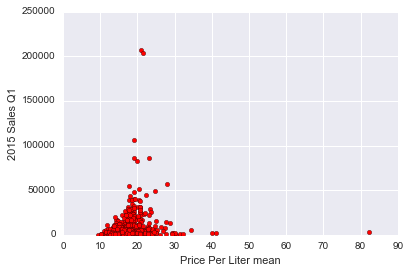

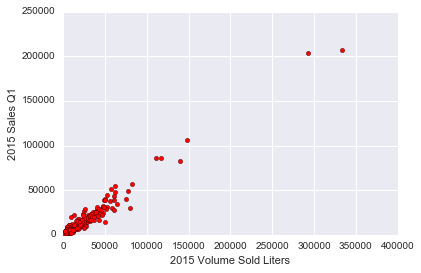

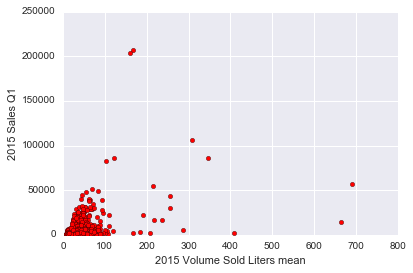

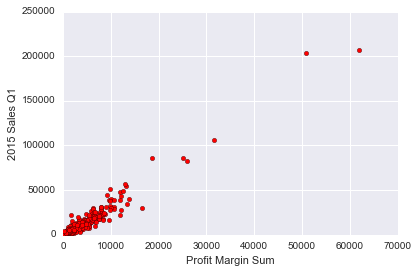

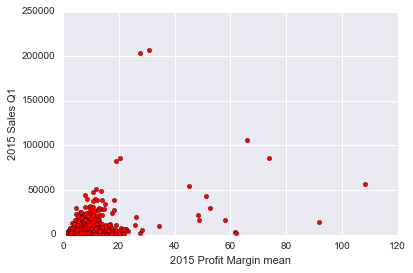

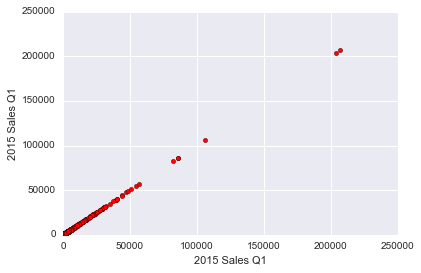

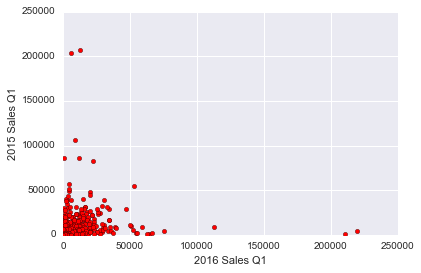

In [85]:
# Sales by store number (sum)
for col in sales_bystornum_s:
    sales_bystornum_s.plot.scatter(x=col, y= '2015 Sales Q1', c = 'r', xlim = 0, ylim = 0)

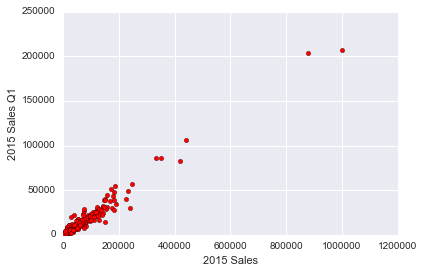

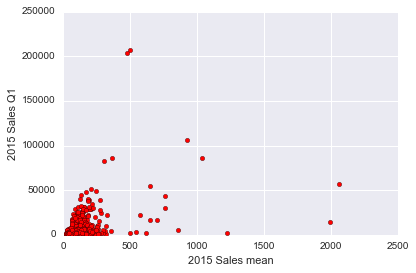

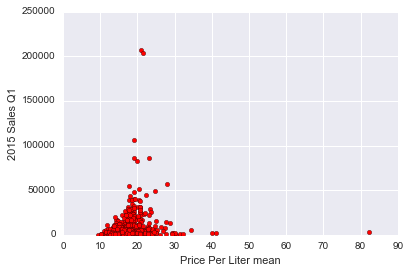

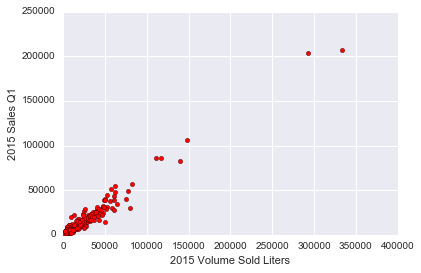

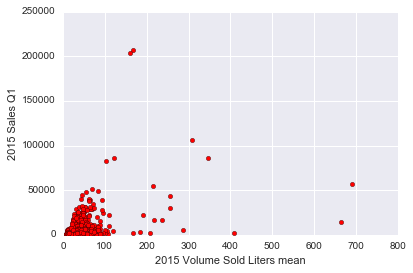

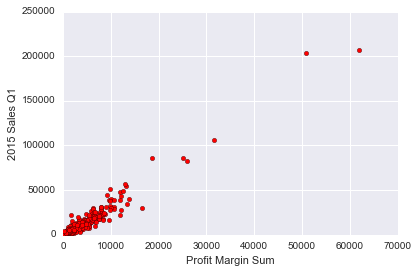

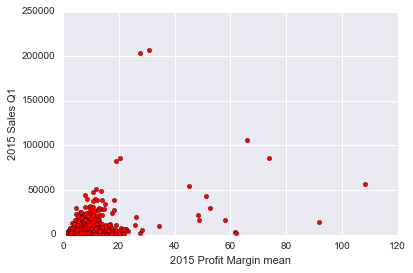

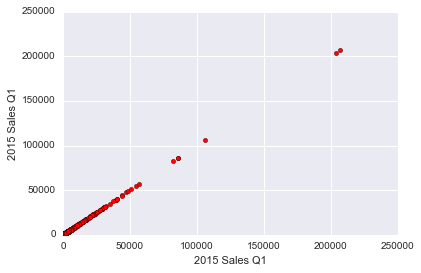

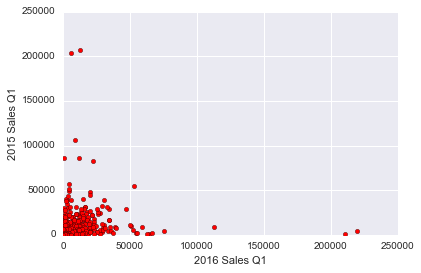

In [84]:
# Sales by Store Number (mean)
for col in sales_bystornum_m:
    sales_bystornum_m.plot.scatter(x=col, y= '2015 Sales Q1', c = 'r', xlim = 0, ylim = 0)

# 2105 Sales Q1 grouped by City

In [86]:
sales_city_m = sales.groupby('City').mean()
sales_city_s = sales.groupby('City').sum()

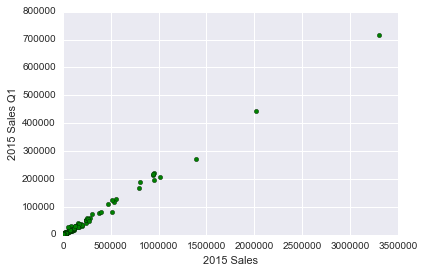

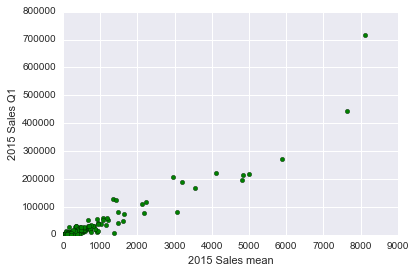

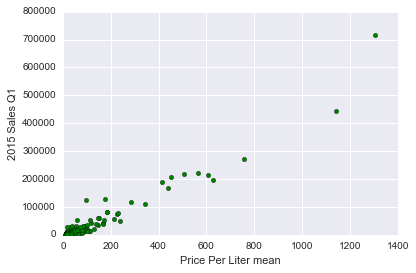

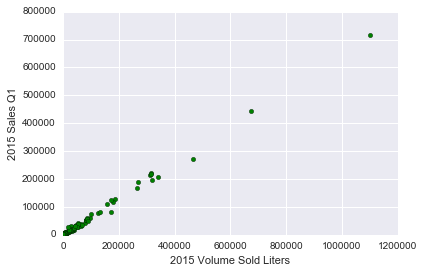

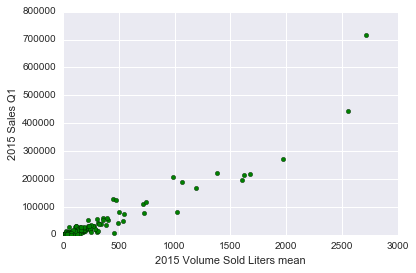

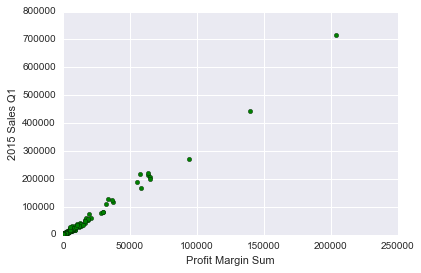

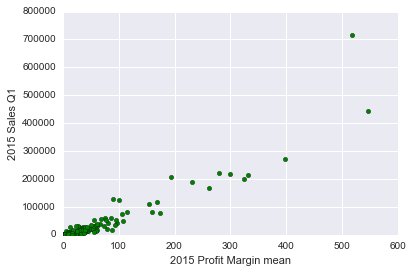

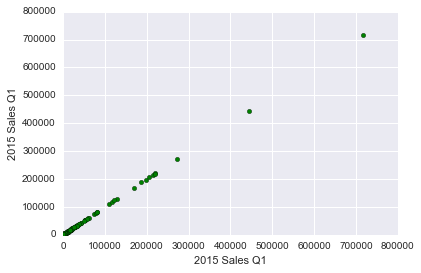

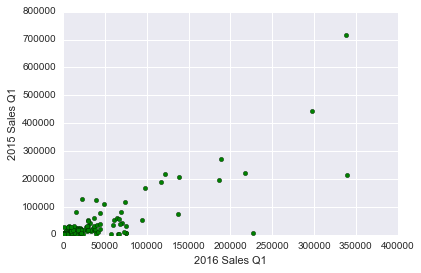

In [87]:
# 2015 Sales compared to other variables grouped by City 
for col in sales_city_s:
    sales_city_s.plot.scatter(x=col, y= '2015 Sales Q1', c = 'g', xlim = 0, ylim = 0)

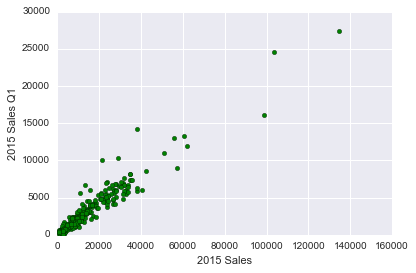

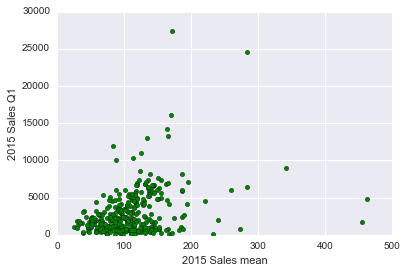

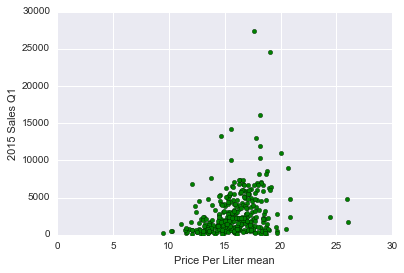

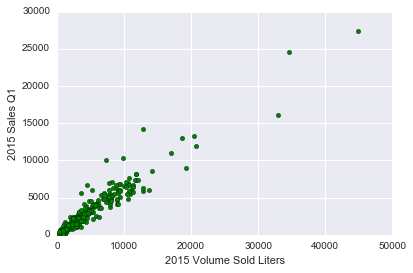

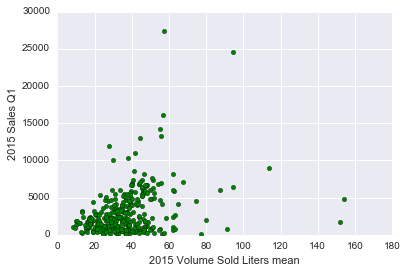

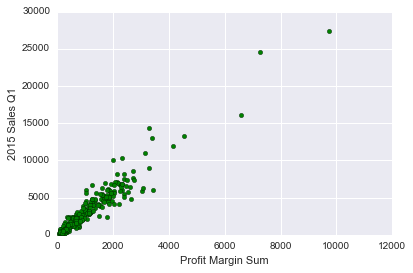

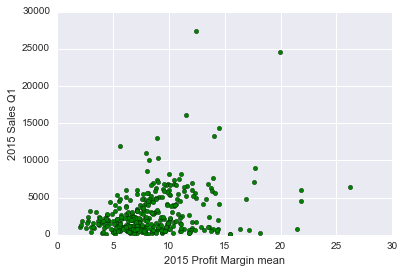

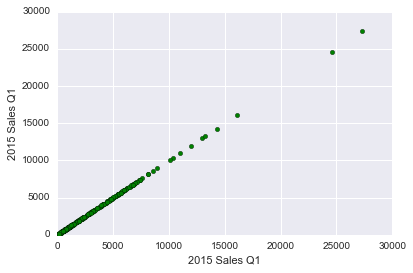

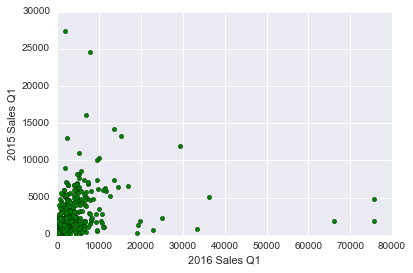

In [88]:
# 2015 Sales compared to other variables grouped by City
for col in sales_city_m:
    sales_city_m.plot.scatter(x=col, y= '2015 Sales Q1', c = 'g', xlim = 0, ylim = 0)

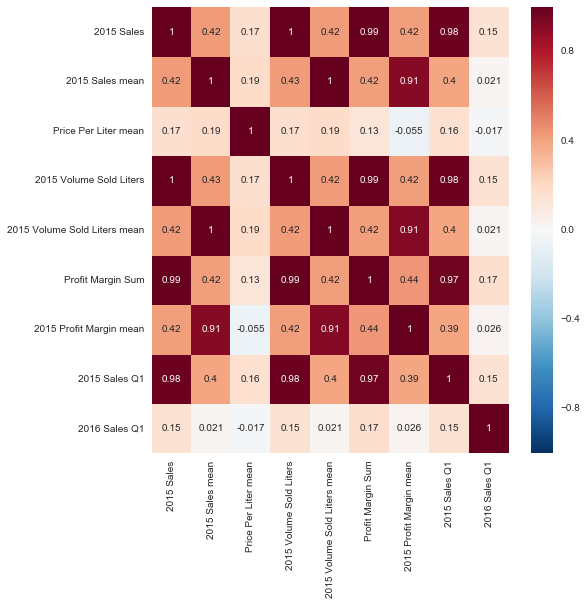

In [90]:
# Mean correlation of sales by Store Number
store_num_m = sales.groupby('Store Number', axis = 0).mean()
store_num_m = store_num_m.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(store_num_m, annot = True)


In [91]:
sales["First Date"] = dates['Date amin']
sales["Last Date"] = dates['Date amax']



In [330]:
# sales.to_csv("sales_iowa_project3.csv")

# Building Models



In [92]:
import statsmodels.api as sm
%pylab inline
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error


Populating the interactive namespace from numpy and matplotlib


In [93]:
y = sales[['2015 Sales Q1']]
X = sales[['2015 Sales']]
X = sm.add_constant(X)
X.head()


,const,2015 Sales
0,1,146326.22
1,1,9310.22
2,1,111871.43
3,1,7721.08
4,1,24324.18


In [94]:
est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          2015 Sales Q1   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 3.379e+04
Date:                Sun, 26 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:50:31   Log-Likelihood:                -10576.
No. Observations:                1161   AIC:                         2.116e+04
Df Residuals:                    1159   BIC:                         2.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         41.4016     69.963      0.592      0.554       -95.866   178.670
2015 Sales     0.2160      0.001    183.820      0.000         0.214     0.218
==============================================================================
Omnibus:                      346.440   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33822.333
Skew:                          -0.255   Prob(JB):                         0.00
Kurtosis:                      29.437   Cond. No.                     6.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
est.params

const         41.401580
2015 Sales     0.215986
dtype: float64

In [96]:
X_prime = np.linspace(sales['2015 Sales'].min(), sales['2015 Sales'].max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  

In [97]:
y_hat = est.predict(X_prime)

(0, 250000.0)

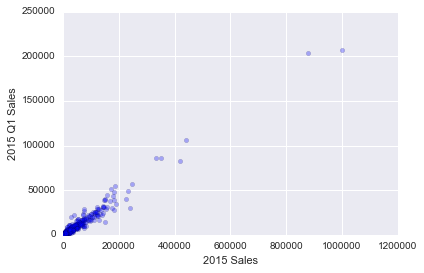

In [98]:
plt.scatter(sales['2015 Sales'], y, alpha=0.3)  # Plot the raw data
plt.xlabel("2015 Sales")
plt.ylabel("2015 Q1 Sales")
plt.xlim(0)
plt.ylim(0)

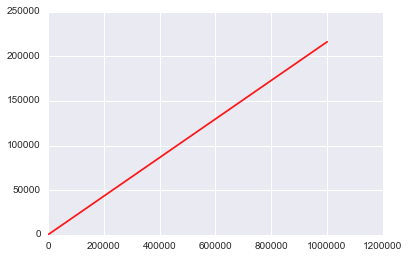

In [99]:
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red
plt.xlim(0)
plt.ylim(0)
plt.rcParams['figure.figsize'] = 10, 10


In [100]:
est = smf.ols(formula= "sales['2015 Sales Q1'] ~ sales['2015 Sales']", data=sales).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     sales['2015 Sales Q1']   R-squared:                       0.967
Model:                                OLS   Adj. R-squared:                  0.967
Method:                     Least Squares   F-statistic:                 3.379e+04
Date:                    Sun, 26 Jun 2016   Prob (F-statistic):               0.00
Time:                            19:50:52   Log-Likelihood:                -10576.
No. Observations:                    1161   AIC:                         2.116e+04
Df Residuals:                        1159   BIC:                         2.117e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              41.4016     69.963      0.592      0.554       -95.866   178.670
sales['2015 Sales']     0.2160      0.001    183.820      0.000         0.214     0.218
==============================================================================
Omnibus:                      346.440   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33822.333
Skew:                          -0.255   Prob(JB):                         0.00
Kurtosis:                      29.437   Cond. No.                     6.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Total Sales 2015 as response variable

In [101]:
# Single variable for 2015 Sales
sales_2015 = sales[['2015 Sales']]
one_vars = sales[['2015 Sales Q1']]

# Two varaibles
two_vars = sales[['2015 Sales Q1', '2015 Volume Sold Liters mean']]

# Multiple variables
many_vars = sales[['2015 Sales Q1', '2015 Volume Sold Liters mean', 'Profit Margin Sum', 'Price Per Liter mean',
                 '2015 Profit Margin mean', '2015 Volume Sold Liters', 'Profit Margin Sum']]

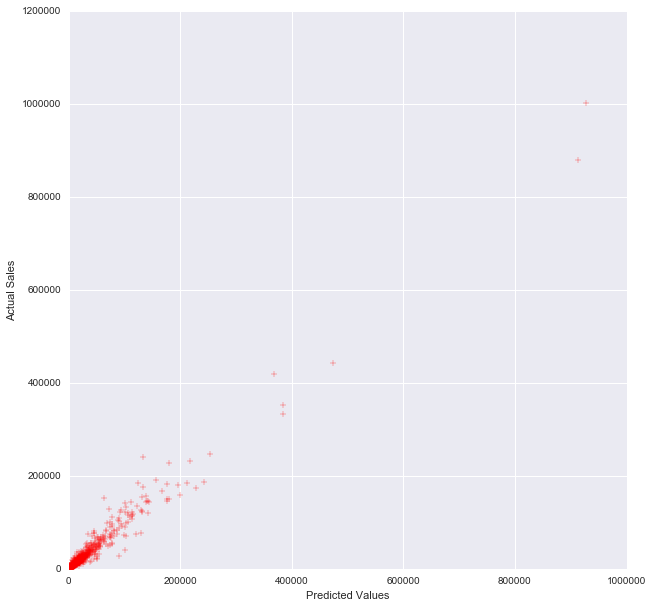

MSE: 99103960.6884 MAE: 4544.0459238 r^2: 0.966837330426


In [102]:
lm = linear_model.LinearRegression()

X = one_vars
y = sales_2015

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Sales")
plt.ylim(0)
plt.xlim(0)
# plt.plot(X, predictions)
plt.show()
print "MSE:", mean_squared_error(y, predictions), "MAE:", mean_absolute_error(y, predictions), "r^2:", model.score(X,y), 

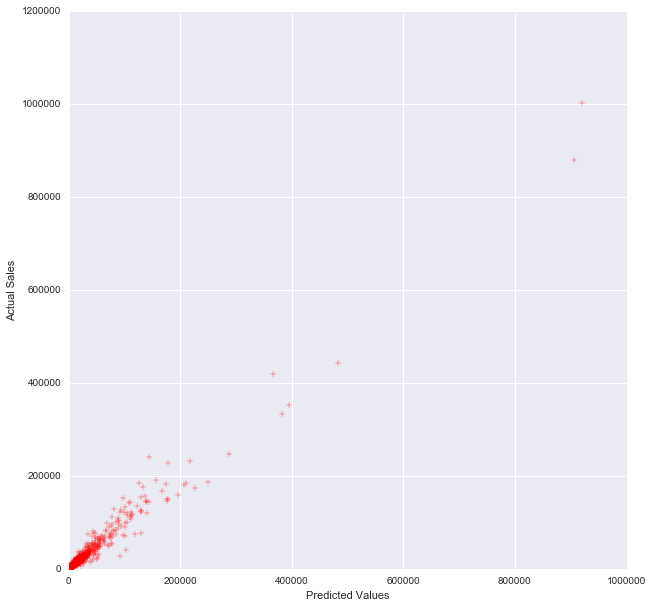

MSE: 94716735.5973 MAE: 4517.46523224 r^2: 0.96830540592


In [103]:
lm = linear_model.LinearRegression()

X = two_vars
y = sales_2015

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Sales")
plt.ylim(0)
plt.xlim(0)
# plt.plot(X, predictions)
plt.show()
print "MSE:", mean_squared_error(y, predictions), "MAE:", mean_absolute_error(y, predictions), "r^2:", model.score(X,y)

In [104]:
many_vars = sales[['2015 Sales Q1', '2015 Volume Sold Liters mean', '2015 Volume Sold Liters', 'Price Per Liter mean']]

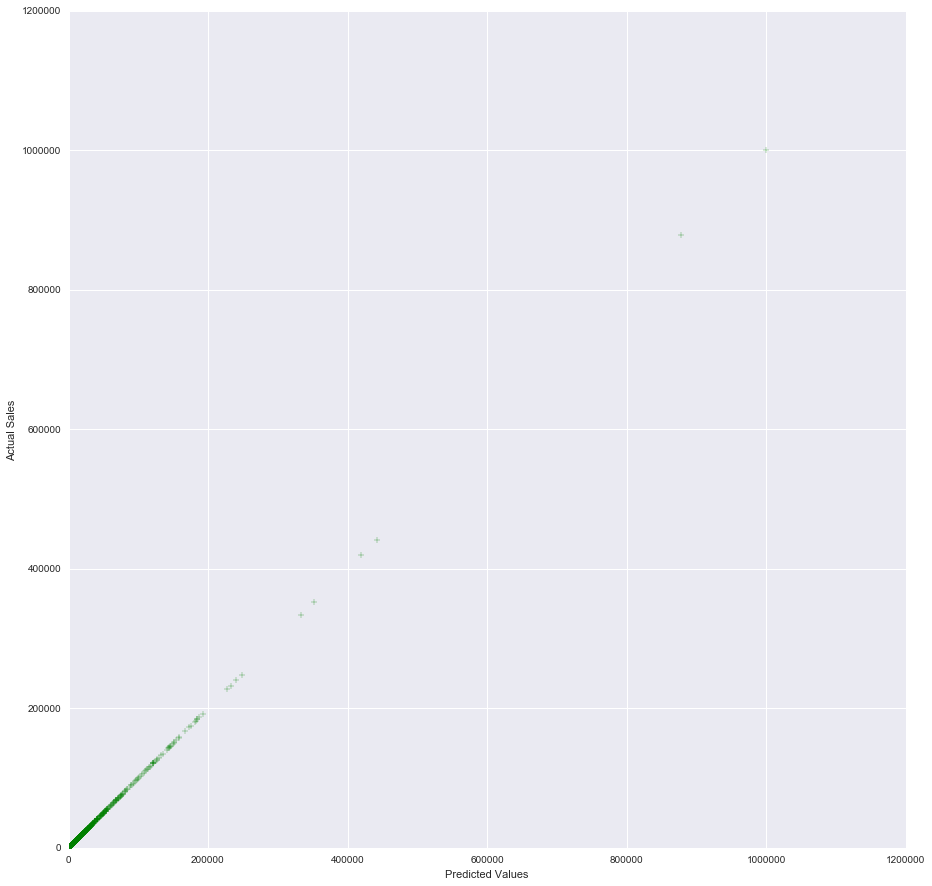

MSE: 15914.0029082 MAE: 59.1896762117 r^2: 0.999994674776


In [105]:
lm = linear_model.LinearRegression()

X = many_vars
y = sales_2015

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.rcParams['figure.figsize'] = 15, 15
plt.scatter(predictions, y, s=30, c='g', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Sales")
plt.ylim(0)
plt.xlim(0)
# plt.plot(X, predictions)
plt.show()
print "MSE:", mean_squared_error(y, predictions), "MAE:", mean_absolute_error(y, predictions), "r^2:", model.score(X,y)

# 2015 Sales Q1 as response variable

In [107]:
# single variable for 2015 Sales Q1
s2015 = sales[['2015 Sales Q1']]
onevar = sales[['2015 Sales']]

# Two varaiables
two_var = sales[['2015 Sales', '2015 Volume Sold Liters mean']]

# multiple variables
many_var = sales[['2015 Sales', '2015 Volume Sold Liters mean', 'Profit Margin Sum', 'Price Per Liter mean',
                 '2015 Profit Margin mean', '2015 Volume Sold Liters', 'Profit Margin Sum']]

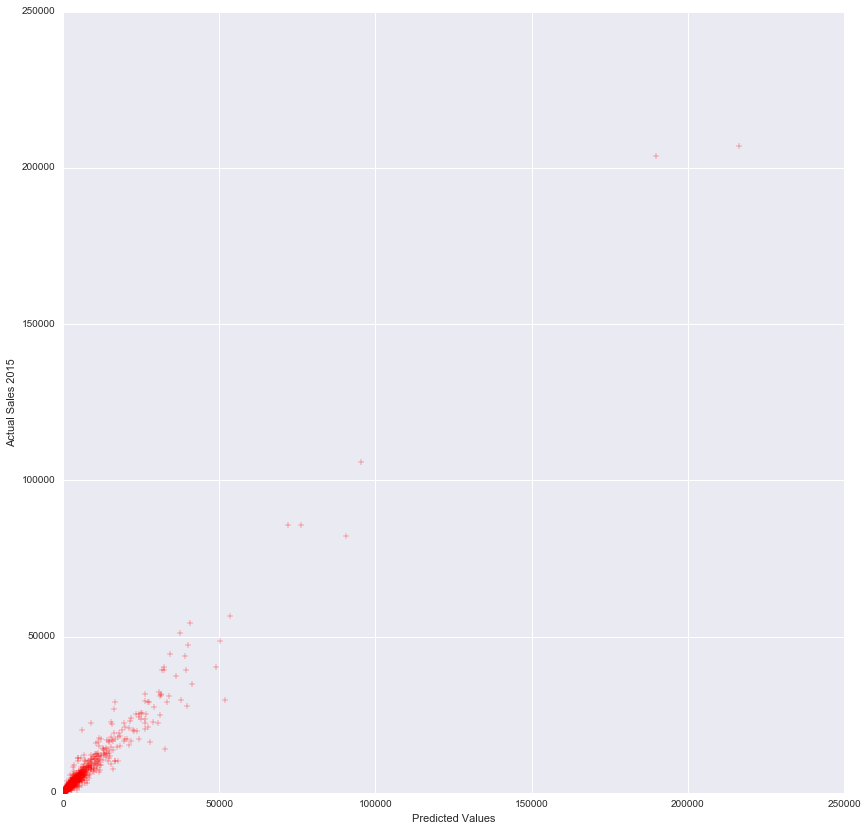

MSE: 4781756.93449 MAE: 990.120544911 r^2: 0.966837330426


In [108]:
lm = linear_model.LinearRegression()

X = onevar
y = s2015

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.rcParams['figure.figsize'] = 14, 14
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Sales 2015")
plt.ylim(0)
plt.xlim(0)
plt.show()
print "MSE:", mean_squared_error(y, predictions), "MAE:", mean_absolute_error(y, predictions), "r^2:", model.score(X,y)


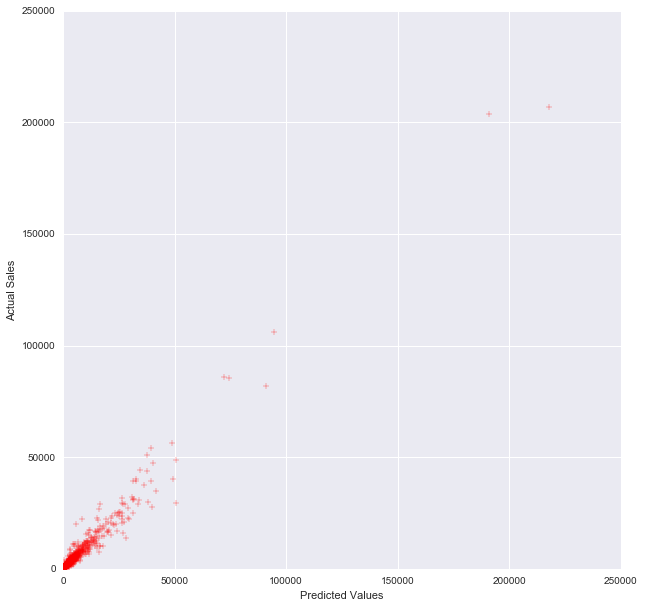

MSE: 4700697.07173 MAE: 994.377208863 r^2: 0.967399500666


In [109]:
lm = linear_model.LinearRegression()

X = two_var
y = s2015

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Sales")
plt.ylim(0)
plt.xlim(0)
plt.show()
print "MSE:", mean_squared_error(y, predictions),"MAE:", mean_absolute_error(y, predictions), "r^2:", model.score(X,y)

In [110]:
many_var = sales[['2015 Sales', '2015 Volume Sold Liters mean', 'Profit Margin Sum', 'Price Per Liter mean',
                 '2015 Profit Margin mean', '2015 Volume Sold Liters', 'Profit Margin Sum']]

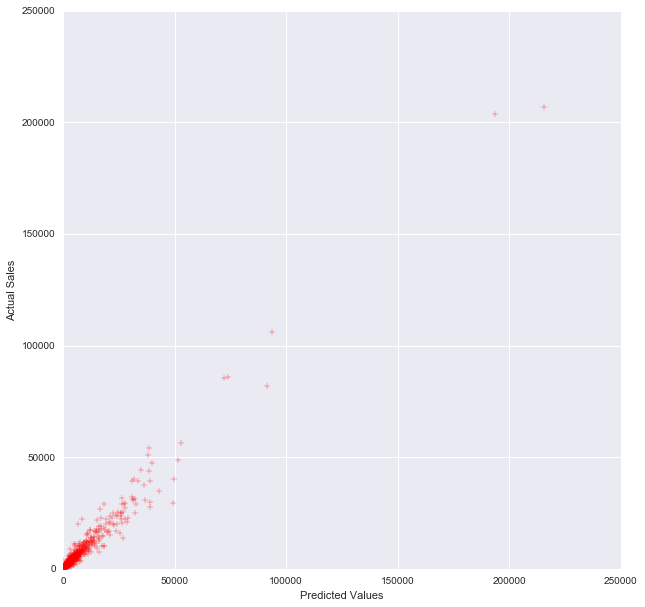

MSE: 4536941.25371 MAE: 1000.25551512 r^2: 0.968535187854


In [111]:
lm = linear_model.LinearRegression()

X = many_var
y = s2015

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Sales")
plt.ylim(0)
plt.xlim(0)
plt.show()
print "MSE:", mean_squared_error(y, predictions), "MAE:", mean_absolute_error(y, predictions), "r^2:", model.score(X,y)

In [115]:
lm = linear_model.LinearRegression()

X = xs
y = ys

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Sales")
plt.ylim(0)
plt.xlim(0)
plt.show()
print "MSE:", mean_squared_error(y, predictions), "MAE:", mean_absolute_error(y, predictions), "r^2:", model.score(X,y)

/Users/smoot/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [   1 1161]

In [1]:
#Standardizing
Xs = sales['2015 Sales']
mean = np.mean(Xs)
std = np.std(Xs)
Xs = [(x - mean) / std for x in Xs]
# Same thing here.  But there is one line of code that will do it for you...see it below
ys = sales['2015 Sales Q1']
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

NameError: name 'sales' is not defined

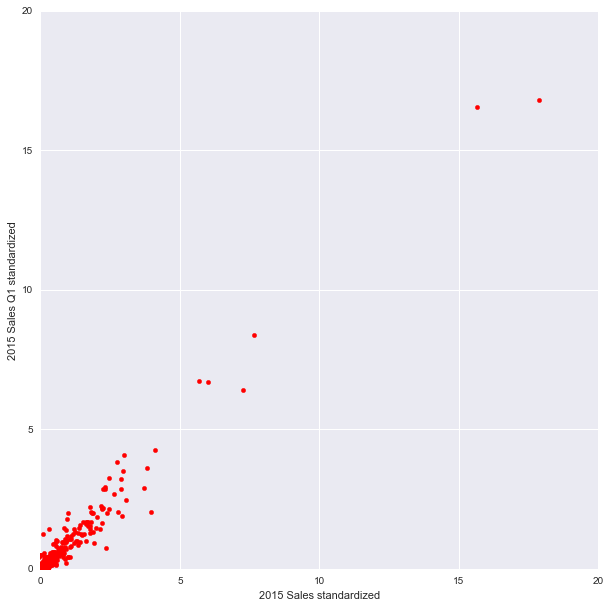

In [114]:
from sklearn import preprocessing

xs = preprocessing.scale(sales['2015 Sales'])
ys = preprocessing.scale(sales['2015 Sales Q1'])

plt.scatter(xs, ys, color='r')
plt.xlabel("2015 Sales standardized")
plt.ylabel("2015 Sales Q1 standardized")
plt.xlim(0)
plt.ylim(0)
plt.show()

In [832]:
lm = linear_model.LinearRegression()

X = sales[['2016 Sales Q1']]
y = sales[['2015 Sales Q1']]

model = lm.fit(X, y)
predictions = lm.predict(X)

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Sales")
plt.ylim(0)
plt.xlim(0)
plt.show()
print "MSE:", mean_squared_error(y, predictions), "MAE:", mean_absolute_error(y, predictions), "r^2:", model.score(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [793]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

NameError: name 'monomials' is not defined

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.